In [1]:
using  SymPy
using  Plots; pyplot()
using LinearAlgebra

In [2]:
Eₘ = 380e3
Eᵣ = 480e3
Eᵢ = Eₘ
νₘ = 0.25
νᵣ = 0.30
νᵢ = νₘ

@show λᵢ = Eᵢ*νᵢ/((1+νᵢ)*(1-2*νᵢ))
@show λₘ = Eₘ*νₘ/((1+νₘ)*(1-2*νₘ))
@show λᵣ = Eᵣ*νᵣ/((1+νᵣ)*(1-2*νᵣ))
@show μᵢ = Eᵢ/(2*(1+νᵢ))
@show μₘ = Eₘ/(2*(1+νₘ))
@show μᵣ = Eᵣ/(2*(1+νᵣ))

λᵢ = (Eᵢ * νᵢ) / ((1 + νᵢ) * (1 - 2νᵢ)) = 152000.0
λₘ = (Eₘ * νₘ) / ((1 + νₘ) * (1 - 2νₘ)) = 152000.0
λᵣ = (Eᵣ * νᵣ) / ((1 + νᵣ) * (1 - 2νᵣ)) = 276923.07692307694
μᵢ = Eᵢ / (2 * (1 + νᵢ)) = 152000.0
μₘ = Eₘ / (2 * (1 + νₘ)) = 152000.0
μᵣ = Eᵣ / (2 * (1 + νᵣ)) = 184615.3846153846


184615.3846153846

In [3]:
Gₘ = 0.01
Gᵣ = 0.01710
Gᵢ = 0.00171

0.00171

In [4]:
L = 2.25
H = 0.5
η = 1e-10

1.0e-10

In [5]:
ht = 0.10
h = 0.01
Hm = 0.30
Hi = 0.05

0.05

In [6]:
x,x₁,y,y₁ = symbols("x,x₁,y,y₁", real = true)

(x, x₁, y, y₁)

### Piecewise function

In [7]:
heaviside(x) = 0.5 * (sign(x) + 1)

interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

interval (generic function with 1 method)

### Gaussian Kernel Function

In [8]:
wₕ(x,x₁) = (1/(sqrt(2*pi)*h))*exp(-(x-x₁)^2/(2*h^2))

wₕ (generic function with 1 method)

In [9]:
Fx1 = interval(x₁,-L-ht,L+ht)*wₕ(x,x₁)
Fy1 = interval(y₁,-H-ht,-H+Hm)*wₕ(y,y₁)
Fy2 = interval(y₁,-H+Hm,-H+Hm+Hi)*wₕ(y,y₁)
Fy3 = interval(y₁,-H+Hm+Hi,-H+2*Hm+Hi)*wₕ(y,y₁)
Fy4 = interval(y₁,-H+2*Hm+Hi,-H+2*Hm+2*Hi)*wₕ(y,y₁)
Fy5 = interval(y₁,-H+2*Hm+2*Hi,-H+3*Hm+2*Hi+ht)*wₕ(y,y₁)

                                                                             2
                                                             -5000.0⋅(y - y₁) 
39.8942280401433⋅(-0.5⋅sign(y₁ - 0.6) + 0.5⋅sign(y₁ - 0.2))⋅ℯ                 

In [10]:
λdiscont1 = λₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,-H+Hm)
λdiscont2 = λᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm,-H+Hm+Hi)
λdiscont3 = λᵣ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm+Hi,-H+2*Hm+Hi)
λdiscont4 = λᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+Hi,-H+2*Hm+2*Hi)
λdiscont5 = λₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+2*Hi,-H+3*Hm+2*Hi+ht)
λdiscont = λdiscont1 + λdiscont2 + λdiscont3 + λdiscont4 + λdiscont5

(-138461.538461538⋅sign(x₁ - 2.35) + 138461.538461538⋅sign(x₁ + 2.35))⋅(-0.5⋅s
ign(y₁ - 0.15) + 0.5⋅sign(y₁ + 0.15)) + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅si
gn(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.6) + 0.5⋅sign(y₁ - 0.2)) + (-76000.0⋅sign(x₁ 
- 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.2) + 0.5⋅sign(y₁ - 0.15))
 + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ + 0.15) 
+ 0.5⋅sign(y₁ + 0.2)) + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(
-0.5⋅sign(y₁ + 0.2) + 0.5⋅sign(y₁ + 0.6))

In [11]:
μdiscont1 = μₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,-H+Hm)
μdiscont2 = μᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm,-H+Hm+Hi)
μdiscont3 = μᵣ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm+Hi,-H+2*Hm+Hi)
μdiscont4 = μᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+Hi,-H+2*Hm+2*Hi)
μdiscont5 = μₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+2*Hi,-H+3*Hm+2*Hi+ht)
μdiscont = μdiscont1 + μdiscont2 + μdiscont3 + μdiscont4 + μdiscont5

(-92307.6923076923⋅sign(x₁ - 2.35) + 92307.6923076923⋅sign(x₁ + 2.35))⋅(-0.5⋅s
ign(y₁ - 0.15) + 0.5⋅sign(y₁ + 0.15)) + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅si
gn(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.6) + 0.5⋅sign(y₁ - 0.2)) + (-76000.0⋅sign(x₁ 
- 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.2) + 0.5⋅sign(y₁ - 0.15))
 + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ + 0.15) 
+ 0.5⋅sign(y₁ + 0.2)) + (-76000.0⋅sign(x₁ - 2.35) + 76000.0⋅sign(x₁ + 2.35))⋅(
-0.5⋅sign(y₁ + 0.2) + 0.5⋅sign(y₁ + 0.6))

In [12]:
Gdiscont1 = Gₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H-ht,-H+Hm)
Gdiscont2 = Gᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm,-H+Hm+Hi)
Gdiscont3 = Gᵣ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+Hm+Hi,-H+2*Hm+Hi)
Gdiscont4 = Gᵢ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+Hi,-H+2*Hm+2*Hi)
Gdiscont5 = Gₘ * interval(x₁,-L-ht,L+ht)* interval(y₁,-H+2*Hm+2*Hi,-H+3*Hm+2*Hi+ht)
Gdiscont = Gdiscont1 + Gdiscont2 + Gdiscont3 + Gdiscont4 + Gdiscont5

(-0.00855⋅sign(x₁ - 2.35) + 0.00855⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.15) + 0
.5⋅sign(y₁ + 0.15)) + (-0.005⋅sign(x₁ - 2.35) + 0.005⋅sign(x₁ + 2.35))⋅(-0.5⋅s
ign(y₁ - 0.6) + 0.5⋅sign(y₁ - 0.2)) + (-0.005⋅sign(x₁ - 2.35) + 0.005⋅sign(x₁ 
+ 2.35))⋅(-0.5⋅sign(y₁ + 0.2) + 0.5⋅sign(y₁ + 0.6)) + (-0.000855⋅sign(x₁ - 2.3
5) + 0.000855⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ - 0.2) + 0.5⋅sign(y₁ - 0.15)) + (
-0.000855⋅sign(x₁ - 2.35) + 0.000855⋅sign(x₁ + 2.35))⋅(-0.5⋅sign(y₁ + 0.15) + 
0.5⋅sign(y₁ + 0.2))

In [13]:
smoothλ1 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy1,(y₁,-H-ht,H+ht))*λₘ
smoothλ2 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy2,(y₁,-H-ht,H+ht))*λᵢ
smoothλ3 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy3,(y₁,-H-ht,H+ht))*λᵣ
smoothλ4 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy4,(y₁,-H-ht,H+ht))*λᵢ
smoothλ5 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy5,(y₁,-H-ht,H+ht))*λₘ
smoothλ = smoothλ1 + smoothλ2 + smoothλ3 + smoothλ4 + smoothλ5;

In [14]:
smoothμ1 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy1,(y₁,-H-ht,H+ht))*μₘ
smoothμ2 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy2,(y₁,-H-ht,H+ht))*μᵢ
smoothμ3 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy3,(y₁,-H-ht,H+ht))*μᵣ
smoothμ4 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy4,(y₁,-H-ht,H+ht))*μᵢ
smoothμ5 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy5,(y₁,-H-ht,H+ht))*μₘ
smoothμ = smoothμ1 + smoothμ2 + smoothμ3 + smoothμ4 + smoothμ5;

In [15]:
smoothG1 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy1,(y₁,-H-ht,H+ht))*Gₘ
smoothG2 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy2,(y₁,-H-ht,H+ht))*Gᵢ
smoothG3 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy3,(y₁,-H-ht,H+ht))*Gᵣ
smoothG4 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy4,(y₁,-H-ht,H+ht))*Gᵢ
smoothG5 = integrate(Fx1,(x₁,-L-ht,L+ht))*integrate(Fy5,(y₁,-H-ht,H+ht))*Gₘ
smoothG = smoothG1 + smoothG2 + smoothG3 + smoothG4 + smoothG5;

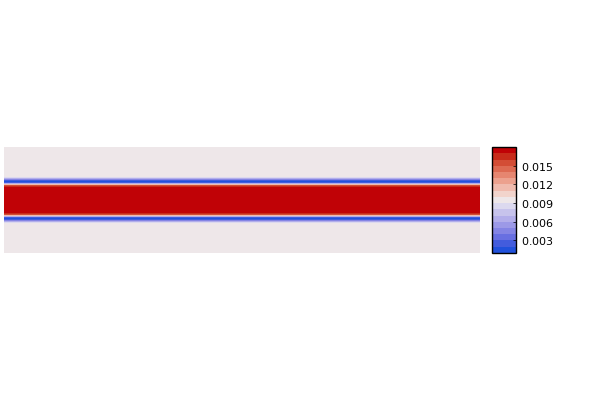

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [16]:
xs = range(-L,L, length=100)
ys = range(-H,H, length=100)

plot1 = contourf(xs, ys, λdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot2 = contourf(xs, ys, smoothλ, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal,camera=(0,90))
plot3 = contourf(xs, ys, μdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot4 = contourf(xs, ys, smoothμ, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot5 = contourf(xs, ys, Gdiscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot6 = contourf(xs, ys, smoothG, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
#plot(plot1,plot2,plot3,plot4,plot5,plot6)
#plot(plot3,plot4)
#plot(plot5,plot6)

In [17]:
cd("ResultsThreePointBending")

LoadError: IOError: cd("ResultsThreePointBending"): no such file or directory (ENOENT)

In [18]:
using Gmsh:gmsh
using  GridapGmsh
using  Gridap
using  Gridap.Geometry
using  Gridap.TensorValues
using  Gridap.Fields
using  Gridap.CellData
using  Gridap.ReferenceFEs

In [19]:
ls = 0.020
hf = ls/2.1
hd = 10*hf
Lₚ = 4.5
Hₚ = 1.0
sw = 0.25
CL = 0.15
LL = hd
cw = 0.01

0.01

In [20]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2, 0.0, hd, 1)
gmsh.model.geo.addPoint(-Lₚ/2+sw, -Hₚ/2, 0.0, hd, 2)
gmsh.model.geo.addPoint(-cw/2, -Hₚ/2, 0.0, hd, 3)
gmsh.model.geo.addPoint(-cw/2, -Hₚ/2+CL, 0.0, hd, 4)
gmsh.model.geo.addPoint(0.0, -Hₚ/2+1.1*CL, 0.0, hd, 5)
gmsh.model.geo.addPoint(cw/2, -Hₚ/2+CL, 0.0, hd, 6)
gmsh.model.geo.addPoint(cw/2, -Hₚ/2, 0.0, hd, 7)
gmsh.model.geo.addPoint(Lₚ/2-sw, -Hₚ/2, 0.0, hd, 8)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2, 0.0, hd, 9)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2+Hm, 0.0, hd, 10)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2+Hm+Hi, 0.0, hd, 11)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2+2*Hm+Hi, 0.0, hd, 12)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2+2*Hm+2*Hi, 0.0, hd, 13)
gmsh.model.geo.addPoint(Lₚ/2, -Hₚ/2+3*Hm+2*Hi, 0.0, hd, 14)
gmsh.model.geo.addPoint(LL, -Hₚ/2+3*Hm+2*Hi, 0.0, hd, 15)
gmsh.model.geo.addPoint(-LL, -Hₚ/2+3*Hm+2*Hi, 0.0, hd, 16)
gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2+3*Hm+2*Hi, 0.0, hd, 17)
gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2+2*Hm+2*Hi, 0.0, hd, 18)
gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2+2*Hm+1*Hi, 0.0, hd, 19)
gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2+1*Hm+1*Hi, 0.0, hd, 20)
gmsh.model.geo.addPoint(-Lₚ/2, -Hₚ/2+1*Hm, 0.0, hd, 21)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 9, 8)
gmsh.model.geo.addLine(9, 10, 9)
gmsh.model.geo.addLine(10, 11, 10)
gmsh.model.geo.addLine(11, 12, 11)
gmsh.model.geo.addLine(12, 13, 12)
gmsh.model.geo.addLine(13, 14, 13)
gmsh.model.geo.addLine(14, 15, 14)
gmsh.model.geo.addLine(15, 16, 15)
gmsh.model.geo.addLine(16, 17, 16)
gmsh.model.geo.addLine(17, 18, 17)
gmsh.model.geo.addLine(18, 19, 18)
gmsh.model.geo.addLine(19, 20, 19)
gmsh.model.geo.addLine(20, 21, 20)
gmsh.model.geo.addLine(21, 1, 21)

gmsh.model.geo.addLine(10, 21, 101)
gmsh.model.geo.addLine(11, 20, 102)
gmsh.model.geo.addLine(12, 19, 103)
gmsh.model.geo.addLine(13, 18, 104)

gmsh.model.geo.addCurveLoop([1,2,3,4,5,6,7,8,9,101,21],1)
gmsh.model.geo.addCurveLoop([10,102,20,-101],2)
gmsh.model.geo.addCurveLoop([11,103,19,-102],3)
gmsh.model.geo.addCurveLoop([12,104,18,-103],4)
gmsh.model.geo.addCurveLoop([13,14,15,16,17,-104],5)

gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.addPlaneSurface([2], 2)
gmsh.model.geo.addPlaneSurface([3], 3)
gmsh.model.geo.addPlaneSurface([4], 4)
gmsh.model.geo.addPlaneSurface([5], 5)

gmsh.model.addPhysicalGroup(0, [2],1)
gmsh.model.addPhysicalGroup(0, [8],2)

gmsh.model.addPhysicalGroup(1, [15],1)

gmsh.model.addPhysicalGroup(2, [1,5],1)
gmsh.model.addPhysicalGroup(2, [3],2)
gmsh.model.addPhysicalGroup(2, [2,4],3)

gmsh.model.setPhysicalName(2, 1, "Matrix")
gmsh.model.setPhysicalName(2, 2, "Fiber")
gmsh.model.setPhysicalName(2, 3, "Interface")

gmsh.model.setPhysicalName(1, 1, "DirichletTop")

gmsh.model.setPhysicalName(0, 1, "DirichletLeft")
gmsh.model.setPhysicalName(0, 2, "DirichletRight")


gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", hd)
gmsh.model.mesh.field.setNumber(11, "XMin", -0.5*Lₚ)
gmsh.model.mesh.field.setNumber(11, "XMax", 0.5*Lₚ)
gmsh.model.mesh.field.setNumber(11, "YMin", -Hm)
gmsh.model.mesh.field.setNumber(11, "YMax", Hm)

gmsh.model.mesh.field.add("Box", 12)
gmsh.model.mesh.field.setNumber(12, "VIn", hf)
gmsh.model.mesh.field.setNumber(12, "VOut", hd)
gmsh.model.mesh.field.setNumber(12, "XMin", -4*cw)
gmsh.model.mesh.field.setNumber(12, "XMax", 4*cw)
gmsh.model.mesh.field.setNumber(12, "YMin", -0.5*Hₚ)
gmsh.model.mesh.field.setNumber(12, "YMax", 0.5*Hₚ)

gmsh.model.mesh.field.add("Min", 13)
gmsh.model.mesh.field.setNumbers(13, "FieldsList", [11,12])

gmsh.model.mesh.field.setAsBackgroundMesh(13)


gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)

gmsh.write("ThreePointBending.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Line)
Info    : Meshing curve 13 (Line)
Info    : Meshing curve 14 (Line)
Info    : Meshing curve 15 (Line)
Info    : Meshing curve 16 (Line)
Info    : Meshing curve 17 (Line)
Info    : Meshing curve 18 (Line)
Info    : Meshing curve 19 (Line)
Info    : Meshing curve 20 (Line)
Info    : Meshing curve 21 (Line)
Info    : Meshing curve 101 (Line)
Info    : Meshing curve 102 (Line)
Info    : Meshing curve 103 (Line)
Info    : Meshing curve 104 (Line)
Info    : Done meshing 1D (0.002426 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Delaunay)
Info    : Meshing surf

In [21]:
model = GmshDiscreteModel("ThreePointBending.msh")
writevtk(model ,"ThreePointBending")

Info    : Reading 'ThreePointBending.msh'...
Info    : 51 entities
Info    : 39632 nodes
Info    : 78977 elements
Info    : Done reading 'ThreePointBending.msh'


3-element Vector{Vector{String}}:
 ["ThreePointBending_0.vtu"]
 ["ThreePointBending_1.vtu"]
 ["ThreePointBending_2.vtu"]

In [22]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension);

In [23]:
order = 1
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [24]:
p = get_cell_points(Ω)

CellPoint()

In [25]:
λn = lambdify(smoothλ)
μn = lambdify(smoothμ)
Gn = lambdify(smoothG)

#118 (generic function with 1 method)

In [26]:
λh(p) = λn.(p[1],p[2])
μh(p) = μn.(p[1],p[2])
Gh(p) = Gn.(p[1],p[2])
reffe = ReferenceFE(lagrangian,Float64,order)
V₁ = FESpace(model, reffe, conformity=:H1)

UnconstrainedFESpace()

In [27]:
V₁₂ = MultiFieldFESpace([V₁,V₁,V₁])

MultiFieldFESpace()

In [28]:
λ_h,μ_h,G_h = interpolate_everywhere([λh,μh,Gh],V₁₂)

MultiFieldFEFunction():
 num_cells: 78964
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4195481235500804601

In [29]:
function σfun(ε,ε_in,s_in,λ,μ)
    σ_elas = λ*tr(ε)*one(ε) + 2*μ*ε
    σ = (s_in ^2+η)*σ_elas
    return  σ
end

σfun (generic function with 1 method)

In [30]:
function ψPos(ε_in,λ,μ)
    σ_elas = λ*tr(ε_in)*one(ε_in) + 2*μ*ε_in
    σ_array = get_array(σ_elas)
    Egn_Vals = eigvals(σ_array)
    Egn_Vecs = eigvecs(σ_array)
    σ1 = Egn_Vals[1]
    σ2 = Egn_Vals[2]
    n1 = VectorValue(Egn_Vecs[:,1])
    n2 = VectorValue(Egn_Vecs[:,2])
 if (σ1)  >= 0
        if (σ2)  >= 0
            ψPlus = 0.5*(ε_in ⊙ (σ1*(n1 ⊗ n1) + σ2*(n2 ⊗ n2)))
        else
            ψPlus = 0.5*(ε_in ⊙ (σ1*(n1 ⊗ n1)))
        end
    elseif (σ1)  < 0
        if (σ2)  >= 0
            ψPlus = 0.5*(ε_in ⊙ (σ2*(n2 ⊗ n2)))
        else
            ψPlus = 0.0
        end
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [31]:
function  new_EnergyState(ψPlusPrev_in,ψhPos_in)
    ψPlus_in = ψhPos_in
    if ψPlus_in  >=ψPlusPrev_in
        ψPlus_out =ψPlus_in
    else
        ψPlus_out=ψPlusPrev_in
    end
    true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [32]:
function  project(q,model ,dΩ,order)
    reffe = ReferenceFE(lagrangian ,Float64 ,order)
    V = FESpace(model ,reffe ,conformity =:L2)
    a(u,v) =∫(u*v)*dΩ
    b(v) =∫(v*q)*dΩ
    op = AffineFEOperator(a,b,V,V)
    qh = Gridap.solve(op)
    return  qh
end

project (generic function with 1 method)

In [33]:
reffe_PF = ReferenceFE(lagrangian ,Float64,order)
V0_PF = TestFESpace(model ,reffe_PF;conformity =:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 78964
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4195481235500804601

In [34]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletLeft","DirichletRight","DirichletTop"],
          dirichlet_masks=[(true,true), (false,true),(false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 78964
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4195481235500804601

In [35]:
writevtk(Ω,"MaterialProperties",cellfields= ["λ"=>λ_h,"μ"=>μ_h,"Gc"=>G_h])

(["MaterialProperties.vtu"],)

In [36]:
writevtk(Ω,"lambda",cellfields= ["λ"=>λ_h])

(["lambda.vtu"],)

In [37]:
LoadTagId = get_tag_from_name(labels,"DirichletTop")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 11
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 11293838723855179047

In [38]:
function   stepPhaseField(uh_in ,ΨPlusPrev_in)
    a_PF(s,φ) =∫( (G_h)*ls*∇(φ)⋅∇(s)+ 2*ΨPlusPrev_in*s*φ+ ((G_h)/ls)*s*φ)*dΩ
    b_PF(φ) =∫( ((G_h)/ls)*φ)*dΩ
    op_PF = AffineFEOperator(a_PF,b_PF ,U_PF ,V0_PF)
    sh_out = Gridap.solve(op_PF)
    return  sh_out
end

stepPhaseField (generic function with 1 method)

In [39]:
function  stepDisp(uh_in,sh_in,λ,μ,vApp)
    uApp1(x) = VectorValue(0.0,0.0)
    uApp2(x) = VectorValue(0.0,0.0)
    uApp3(x) = VectorValue(0.0,-vApp)
    U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])
    a_Disp(u,v) =∫( (ε(v)⊙(σfun∘(ε(u),ε(uh_in),sh_in,λ,μ)) ) )*dΩ
    b_Disp(v) = 0.0
    op_Disp = AffineFEOperator(a_Disp ,b_Disp ,U_Disp ,V0_Disp)
    uh_out = Gridap.solve(op_Disp)
    return  uh_out
end

stepDisp (generic function with 1 method)

In [40]:
vApp = 0
const  vAppMax = 0.004
delv = vAppMax/500
innerMax = 10
count = 0
Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

sPrev = CellState(1.0,dΩ)
sh = project(sPrev ,model ,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)

while  vApp .< vAppMax
    count = count  .+ 1
    #=if vApp  >= 0.01
        delv = 1e-4
end=#
    
    vApp = vApp .+ delv
    print("\n Entering  displacemtent  step $count :", float(vApp))

    for  inner = 1: innerMax
        ψhPlusPrev = project(ψPlusPrev ,model ,dΩ,order)
        RelErr = abs(sum(∫( (G_h)*ls*∇(sh)⋅∇(sh) + 2*ψhPlusPrev*sh*sh + ((G_h)/ls)*sh*sh)*dΩ-∫( ((G_h)/ls)*sh)*dΩ))/abs(sum(∫( ((G_h)/ls)*sh)*dΩ))
        print("\n Relative Error :", float(RelErr))
        sh = stepPhaseField(uh,ψhPlusPrev)
        uh = stepDisp(uh,sh,λ_h,μ_h,vApp)
        ψhPos_in =ψPos∘(ε(uh),λ_h,μ_h)
        update_state!( new_EnergyState ,ψPlusPrev ,ψhPos_in)
        if   RelErr  < 1e-8
            break
        end
    end
    Node_Force = sum(∫(n_Γ_Load⋅(σfun∘(ε(uh),ε(uh),sh,λ_h,μ_h)))*dΓ_Load)
    push!(Load , -Node_Force[2])
    push!( Displacement , vApp)
    writevtk(Ω,"results_SymThreePtBendingTest$count",cellfields= ["uh"=>uh ,"s"=>sh,"epsi"=>ε(uh)])
 end


 Entering  displacemtent  step 1 :8.0e-6
 Relative Error :3.474512519582436e-17
 Entering  displacemtent  step 2 :1.6e-5
 Relative Error :2.0223543063514618e-7
 Relative Error :6.067059964354955e-7
 Relative Error :1.001512148067229e-11
 Entering  displacemtent  step 3 :2.4e-5
 Relative Error :9.699617190740348e-16
 Entering  displacemtent  step 4 :3.2e-5
 Relative Error :1.0111679331880385e-6
 Relative Error :1.4156542548838286e-6
 Relative Error :9.349151296783336e-11
 Entering  displacemtent  step 5 :3.9999999999999996e-5
 Relative Error :3.4169433563417966e-14
 Entering  displacemtent  step 6 :4.7999999999999994e-5
 Relative Error :1.8200443651143944e-6
 Relative Error :2.2246317852528248e-6
 Relative Error :3.3071669376378616e-10
 Entering  displacemtent  step 7 :5.599999999999999e-5
 Relative Error :2.7164314729968105e-13
 Entering  displacemtent  step 8 :6.4e-5
 Relative Error :2.628808077004311e-6
 Relative Error :3.0336622853804403e-6
 Relative Error :8.023274135831301e-10
 E

LoadError: InterruptException:

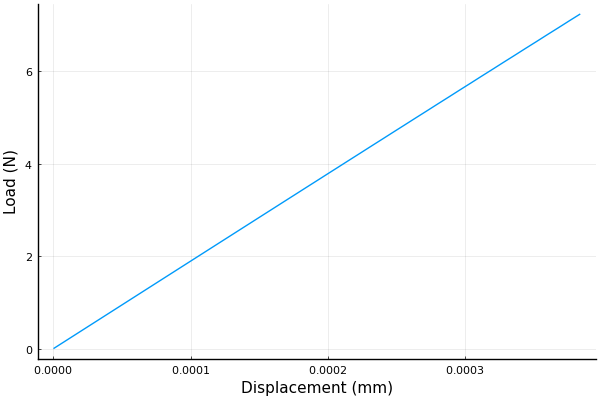

In [41]:
dispPlot = plot(Displacement,Load,label = nothing)
xlabel!("Displacement (mm)")
ylabel!("Load (N)")

In [42]:
savefig(dispPlot,"DisplacementPlot.pdf")

In [43]:
maximum(Load)

7.235648802041901

In [44]:
using DelimitedFiles
Disp = writedlm("DispDataSingleLayerPlatewithCentralHoleAndEdgeNotch.csv",  Displacement, ',')
Force = writedlm("LoadDataSingleLayerPlatewithCentralHoleAndEdgeNotch.csv",  Load, ',')

l₁ = 0.1
β(x) = exp(-abs(x)/l₁)

Gᵢ = 0.05
Gₘ = 1.0
Gᵣ = 0.75
Gₛ = β(x₁)*Gᵢ + (1-β(x₁))*Gₘ
GGₛ = β(x₁)*Gᵢ + (1-β(x₁))*Gᵣ

plot(Gₛ,-1,0)
plot!(GGₛ,0,1)
plot!(β,-1,1)